# Week 3: Support Vector Machines

This part of the workshop is dedicated to Support Vector Machines. The aims of this part are (i) to appreciate how the use of kernels results in non-linear decision boundaries, and (ii) to see how regularisation and kernel parameters affect this shape.

We start with same old initialisation line.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Cats Dataset

This time we are going to use a real-world dataset that is not linearly separable. The dataset consists of about 150 trainig examples with two attributes each. Each example corresponds to a cat and the two attributes are some physiological measurements for that cat. Along with the measuremnets, the sex of the cat is also recorded as a label. We encode sex using 1 for female cats and -1 for male cats.

*(This data was popularised by the following publication: Fisher, R.A. (1947) The analysis of covariance method for the relation between a part and the whole. Biometrics, 3, 65–68.)*

In [2]:
def load_cats_data():
    d = numpy.array([
[2.0, 7.0, 1],
[2.0, 7.4, 1],
[2.0, 9.5, 1],
[2.1, 7.2, 1],
[2.1, 7.3, 1],
[2.1, 7.6, 1],
[2.1, 8.1, 1],
[2.1, 8.2, 1],
[2.1, 8.3, 1],
[2.1, 8.5, 1],
[2.1, 8.7, 1],
[2.1, 9.8, 1],
[2.2, 7.1, 1],
[2.2, 8.7, 1],
[2.2, 9.1, 1],
[2.2, 9.7, 1],
[2.2, 10.9, 1],
[2.2, 11.0, 1],
[2.3, 7.3, 1],
[2.3, 7.9, 1],
[2.3, 8.4, 1],
[2.3, 9.0, 1],
[2.3, 9.0, 1],
[2.3, 9.5, 1],
[2.3, 9.6, 1],
[2.3, 9.7, 1],
[2.3, 10.1, 1],
[2.3, 10.1, 1],
[2.3, 10.6, 1],
[2.3, 11.2, 1],
[2.4, 6.3, 1],
[2.4, 8.7, 1],
[2.4, 8.8, 1],
[2.4, 10.2, 1],
[2.5, 9.0, 1],
[2.5, 10.9, 1],
[2.6, 8.7, 1],
[2.6, 10.1, 1],
[2.6, 10.1, 1],
[2.7, 8.5, 1],
[2.7, 10.2, 1],
[2.7, 10.8, 1],
[2.9, 9.9, 1],
[2.9, 10.1, 1],
[2.9, 10.1, 1],
[3.0, 10.6, 1],
[3.0, 13.0, 1],
[2.0, 6.5, -1],
[2.0, 6.5, -1],
[2.1, 10.1, -1],
[2.2, 7.2, -1],
[2.2, 7.6, -1],
[2.2, 7.9, -1],
[2.2, 8.5, -1],
[2.2, 9.1, -1],
[2.2, 9.6, -1],
[2.2, 9.6, -1],
[2.2, 10.7, -1],
[2.3, 9.6, -1],
[2.4, 7.3, -1],
[2.4, 7.9, -1],
[2.4, 7.9, -1],
[2.4, 9.1, -1],
[2.4, 9.3, -1],
[2.5, 7.9, -1],
[2.5, 8.6, -1],
[2.5, 8.8, -1],
[2.5, 8.8, -1],
[2.5, 9.3, -1],
[2.5, 11.0, -1],
[2.5, 12.7, -1],
[2.5, 12.7, -1],
[2.6, 7.7, -1],
[2.6, 8.3, -1],
[2.6, 9.4, -1],
[2.6, 9.4, -1],
[2.6, 10.5, -1],
[2.6, 11.5, -1],
[2.7, 8.0, -1],
[2.7, 9.0, -1],
[2.7, 9.6, -1],
[2.7, 9.6, -1],
[2.7, 9.8, -1],
[2.7, 10.4, -1],
[2.7, 11.1, -1],
[2.7, 12.0, -1],
[2.7, 12.5, -1],
[2.8, 9.1, -1],
[2.8, 10.0, -1],
[2.8, 10.2, -1],
[2.8, 11.4, -1],
[2.8, 12.0, -1],
[2.8, 13.3, -1],
[2.8, 13.5, -1],
[2.9, 9.4, -1],
[2.9, 10.1, -1],
[2.9, 10.6, -1],
[2.9, 11.3, -1],
[2.9, 11.8, -1],
[3.0, 10.0, -1],
[3.0, 10.4, -1],
[3.0, 10.6, -1],
[3.0, 11.6, -1],
[3.0, 12.2, -1],
[3.0, 12.4, -1],
[3.0, 12.7, -1],
[3.0, 13.3, -1],
[3.0, 13.8, -1],
[3.1, 9.9, -1],
[3.1, 11.5, -1],
[3.1, 12.1, -1],
[3.1, 12.5, -1],
[3.1, 13.0, -1],
[3.1, 14.3, -1],
[3.2, 11.6, -1],
[3.2, 11.9, -1],
[3.2, 12.3, -1],
[3.2, 13.0, -1],
[3.2, 13.5, -1],
[3.2, 13.6, -1],
[3.3, 11.5, -1],
[3.3, 12.0, -1],
[3.3, 14.1, -1],
[3.3, 14.9, -1],
[3.3, 15.4, -1],
[3.4, 11.2, -1],
[3.4, 12.2, -1],
[3.4, 12.4, -1],
[3.4, 12.8, -1],
[3.4, 14.4, -1],
[3.5, 11.7, -1],
[3.5, 12.9, -1],
[3.5, 15.6, -1],
[3.5, 15.7, -1],
[3.5, 17.2, -1],
[3.6, 11.8, -1],
[3.6, 13.3, -1],
[3.6, 14.8, -1],
[3.6, 15.0, -1],
[3.7, 11.0, -1],
[3.8, 14.8, -1],
[3.8, 16.8, -1],
[3.9, 14.4, -1],
[3.9, 20.5, -1]])
    
    X = d[:,[0,1]]
    y = d[:,2]
    
    return X,y

This is what the data looks like (black squares are male cats, red circles are female cats).

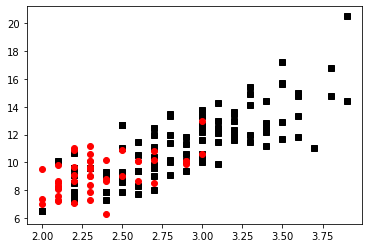

In [3]:
X,y = load_cats_data()
plt.plot(X[y==-1,0], X[y==-1,1], "ks")
plt.plot(X[y==1,0], X[y==1,1], "ro")

## SVM Decision Boundaries

We first define an auxiliary function for plotting decision boundaries.

In [4]:
# X are training data instances, y are labels
# cls is a trained SVM classifier,
# and name is the title of the plot
def plot_boundary(X, y, cls, name):
    # create a mesh to plot in
    h = 0.02 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(arange(x_min, x_max, h),
                        arange(y_min, y_max, h))
    
    # plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # put the result into a color plot
    Z = Z.reshape(xx.shape)
    contourf(xx, yy, Z, cmap=cm.Paired, alpha=0.8)
    
    # plot also the training points
    scatter(X[:, 0], X[:, 1], c=y, cmap=cm.Paired)
    xlim(xx.min(), xx.max())
    ylim(yy.min(), yy.max())
    title(name)

In the following excersises, you will be asked to experiment with various parameters. In all cases, you should pay attention to how these parameters control the degree of overfitting and try to explain the observed effect.

Now train soft margin SVM classifier with a linear kernel, which means that the original attributes are not transformed. Note that what is called $C$ in this implementation corresponds to $\frac{C}{n}$ in lectures, where $n$ is the number of training instances. Also note that SVMs are called Support Vector Classifiers (SVCs) in this package. *Experiment with different values of $C$ and see how it affects the result.*

Accuracy for C value 0.1: 0.7291666666666666
Accuracy for C value 0.5: 0.7777777777777778
Accuracy for C value 1: 0.7916666666666666
Accuracy for C value 5: 0.8055555555555556
Accuracy for C value 10: 0.8055555555555556
Accuracy for C value 100: 0.7916666666666666
Accuracy for C value 1000: 0.7916666666666666


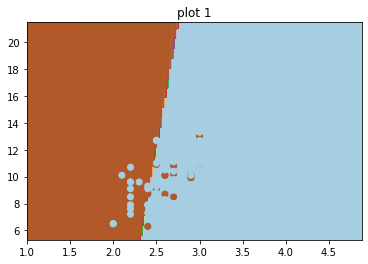

In [31]:
###answer to question 1 here
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
c_list = [0.1, 0.5, 1, 5, 10, 100, 1000]
for c_value in c_list:
    cls = SVC(kernel='linear', C=c_value)
    cls.fit(X, y)
    X,y = load_cats_data()
    plot_boundary(X, y, cls, "plot 1")
    y_pred = cls.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'Accuracy for C value {c_value}: {accuracy}')
# bigger the C value it trys to contain more instance to the
# correct side of the boundary to minimise the penalty.

This doesn't work well, because the data is not linearly separable. Now try a polynomial kernel to see if the shape of the decision boundary can be changed. *Experiment with different polynomial degrees.*

Accuracy for poly degree 1: 0.6736111111111112
Accuracy for poly degree 2: 0.7152777777777778
Accuracy for poly degree 3: 0.7430555555555556
Accuracy for poly degree 4: 0.7361111111111112
Accuracy for poly degree 5: 0.7361111111111112
Accuracy for poly degree 6: 0.75
Accuracy for poly degree 7: 0.7569444444444444
Accuracy for poly degree 8: 0.75
Accuracy for poly degree 9: 0.7430555555555556
Accuracy for poly degree 10: 0.7430555555555556


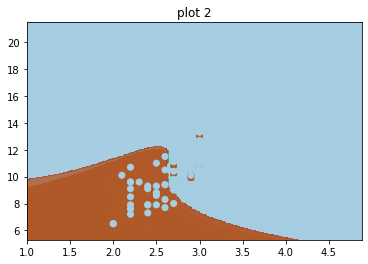

In [33]:
###answer to question 2 here
from sklearn.svm import SVC
for poly_degree in range(1,11):
    cls = SVC(kernel='poly', degree=poly_degree)
    cls.fit(X, y)
    X,y = load_cats_data()
    plot_boundary(X, y, cls, "plot 2")
    y_pred = cls.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'Accuracy for poly degree {poly_degree}: {accuracy}')
# when degree go from 2 to 5 it create a parabola shape boundary
# when degree go from 6 to 9 it create a cubic shape like boundary
# shape keep change for higher degrees
# accuracy went up to the highest when degree = 7

Finally, let's explore the Gaussian kernel (aka RBF kernel). Note that here $\gamma=\frac{1}{2\sigma^2}$, where $\sigma$ is the standard deviation of the Gaussian. *Experiment with different standard deviations of the kernel.*

Accuracy for sigma value 1.0: 0.7916666666666666


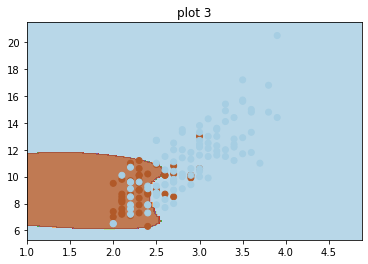

In [41]:
##answer to question 3 here
from sklearn.svm import SVC
sigma_values = [0.1, 0.5, 1.0, 2.0, 5.0]
for sigma in sigma_values:
    gamma__ = 1 / (2 * sigma**2)
    cls = SVC(kernel='rbf', gamma=gamma__)
    cls.fit(X, y)
    X,y = load_cats_data()
    plot_boundary(X, y, cls, "plot 3")
    y_pred = cls.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'Accuracy for sigma value {sigma}: {accuracy}')
    break
# the accuracy merged to 0.9722 for sigma when it approach to 0.

*Which kernel do you think works best for this data and why?*

Answer to question 4 here

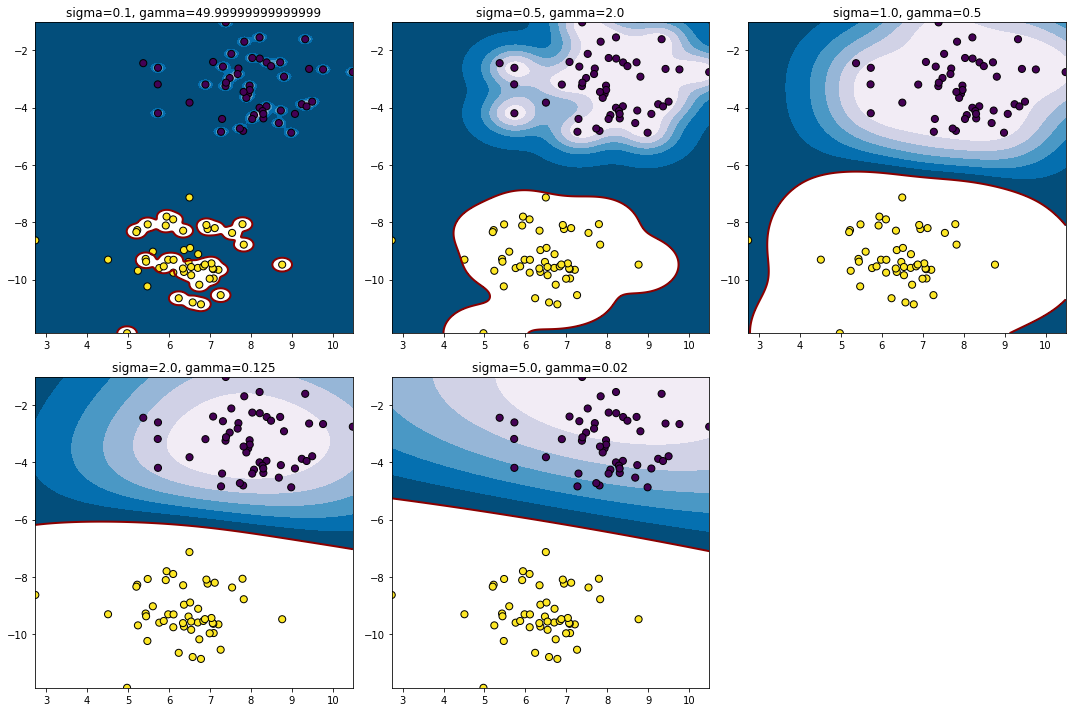

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of sigma values to experiment with
sigma_values = [0.1, 0.5, 1.0, 2.0, 5.0]

plt.figure(figsize=(15, 10))

for i, sigma in enumerate(sigma_values, 1):
    gamma = 1 / (2 * sigma**2)
    svm_classifier = SVC(kernel='rbf', gamma=gamma)
    svm_classifier.fit(X_train, y_train)
    
    # Plot decision boundary
    plt.subplot(2, 3, i)
    plt.title(f'sigma={sigma}, gamma={gamma}')
    
    # Create a grid to plot the decision boundary
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 500))
    Z = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    
plt.tight_layout()
plt.show()
